In [91]:
#import packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

In [2]:
#import data
customer=pd.read_csv('Customer.csv')
tran=pd.read_csv('Transactions.csv')
prod=pd.read_csv('prod_cat_info.csv')

In [3]:
customer.head()

,customer_Id,DOB,Gender,city_code
0,268408,02-01-1970,M,4.0
1,269696,07-01-1970,F,8.0
2,268159,08-01-1970,F,8.0
3,270181,10-01-1970,F,2.0
4,268073,11-01-1970,M,1.0


In [4]:
customer.shape

(5647, 4)

In [5]:
tran.head()

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop
2,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop
3,93274880719,271509,24-02-2014,11,6,-3,-1363,429.345,-4518.345,e-Shop
4,51750724947,273420,23-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop


In [6]:
tran.shape

(23053, 10)

In [7]:
prod.head()

,prod_cat_code,prod_cat,prod_sub_cat_code,prod_subcat
0,1,Clothing,4,Mens
1,1,Clothing,1,Women
2,1,Clothing,3,Kids
3,2,Footwear,1,Mens
4,2,Footwear,3,Women


In [8]:
prod.shape

(23, 4)

### 1. Merge the datasets Customers, Product Hierarchy and Transactions as Customer_Final. Ensure to
### keep all customers who have done transactions with us and select the join type accordingly.

In [9]:
customer_final = pd.merge(tran, customer, left_on='cust_id',right_on='customer_Id', how='inner')
customer_final = pd.merge(customer_final, prod, on='prod_cat_code', how='inner')

In [10]:
customer_final

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,customer_Id,DOB,Gender,city_code,prod_cat,prod_sub_cat_code,prod_subcat
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.30,-4265.30,e-Shop,270351,26-09-1981,M,5.0,Clothing,4,Mens
1,80712190438,270351,28-02-2014,1,1,-5,-772,405.30,-4265.30,e-Shop,270351,26-09-1981,M,5.0,Clothing,1,Women
2,80712190438,270351,28-02-2014,1,1,-5,-772,405.30,-4265.30,e-Shop,270351,26-09-1981,M,5.0,Clothing,3,Kids
3,80712190438,270351,20-02-2014,1,1,5,772,405.30,4265.30,e-Shop,270351,26-09-1981,M,5.0,Clothing,4,Mens
4,80712190438,270351,20-02-2014,1,1,5,772,405.30,4265.30,e-Shop,270351,26-09-1981,M,5.0,Clothing,1,Women
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99288,65823235153,272650,16-02-2011,11,6,2,358,75.18,791.18,e-Shop,272650,28-02-1990,M,2.0,Home and kitchen,12,Tools
99289,20417144530,269556,29-01-2011,10,6,3,654,206.01,2168.01,Flagship store,269556,27-12-1972,M,5.0,Home and kitchen,2,Furnishing
99290,20417144530,269556,29-01-2011,10,6,3,654,206.01,2168.01,Flagship store,269556,27-12-1972,M,5.0,Home and kitchen,10,Kitchen
99291,20417144530,269556,29-01-2011,10,6,3,654,206.01,2168.01,Flagship store,269556,27-12-1972,M,5.0,Home and kitchen,11,Bath


In [87]:
#finding missing values
customer_final.isna().sum()

transaction_id           0
cust_id                  0
tran_date            39424
prod_subcat_code         0
prod_cat_code            0
Qty                      0
Rate                     0
Tax                      0
total_amt                0
Store_type               0
customer_Id              0
DOB                      0
Gender                  40
city_code                0
prod_cat                 0
prod_sub_cat_code        0
prod_subcat              0
dtype: int64

In [88]:
#treating missing values
customer_final['city_code']=np.where(customer_final['city_code'].isna(),customer_final['city_code'].mode(),customer_final['city_code'])
customer_final['tran_date']=np.where(customer_final['tran_date'].isna(),customer_final['tran_date'].median(),customer_final['tran_date'])
customer_final['Gender']=np.where(customer_final['Gender'].isna(),customer_final['Gender'].mode(),customer_final['Gender'])


In [94]:
#changing data type
customer_final['city_code']=customer_final['city_code'].astype(str)
customer_final['tran_date']=pd.to_datetime(customer_final['tran_date'])
customer_final['DOB']=pd.to_datetime(customer_final['DOB'])

C:\Users\Admin\AppData\Local\Temp\ipykernel_4708\1137728052.py:4: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  customer_final['DOB']=pd.to_datetime(customer_final['DOB'])


### 2. Prepare a summary report for the merged data set.
### a. Get the column names and their corresponding data types

In [95]:
customer_final.dtypes

transaction_id                int64
cust_id                       int64
tran_date            datetime64[ns]
prod_subcat_code              int64
prod_cat_code                 int64
Qty                           int64
Rate                          int64
Tax                         float64
total_amt                   float64
Store_type                   object
customer_Id                   int64
DOB                  datetime64[ns]
Gender                       object
city_code                    object
prod_cat                     object
prod_sub_cat_code             int64
prod_subcat                  object
dtype: object

###  b. Top/Bottom 10 observations

In [15]:
customer_final.head(10)
#top 10 observations

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,customer_Id,DOB,Gender,city_code,prod_cat,prod_sub_cat_code,prod_subcat
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop,270351,26-09-1981,M,5.0,Clothing,4,Mens
1,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop,270351,26-09-1981,M,5.0,Clothing,1,Women
2,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop,270351,26-09-1981,M,5.0,Clothing,3,Kids
3,80712190438,270351,20-02-2014,1,1,5,772,405.300,4265.300,e-Shop,270351,26-09-1981,M,5.0,Clothing,4,Mens
4,80712190438,270351,20-02-2014,1,1,5,772,405.300,4265.300,e-Shop,270351,26-09-1981,M,5.0,Clothing,1,Women
5,80712190438,270351,20-02-2014,1,1,5,772,405.300,4265.300,e-Shop,270351,26-09-1981,M,5.0,Clothing,3,Kids
6,18505840838,271509,16-12-2013,1,1,3,1229,387.135,4074.135,Flagship store,271509,08-06-1981,M,3.0,Clothing,4,Mens
7,18505840838,271509,16-12-2013,1,1,3,1229,387.135,4074.135,Flagship store,271509,08-06-1981,M,3.0,Clothing,1,Women
8,18505840838,271509,16-12-2013,1,1,3,1229,387.135,4074.135,Flagship store,271509,08-06-1981,M,3.0,Clothing,3,Kids
9,63126920365,271489,22-05-2011,4,1,4,131,55.020,579.020,TeleShop,271489,21-04-1971,M,9.0,Clothing,4,Mens


In [16]:
customer_final.tail(10)
#bottom 10 observations

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,customer_Id,DOB,Gender,city_code,prod_cat,prod_sub_cat_code,prod_subcat
99283,34958490122,266849,20-02-2011,12,6,4,1155,485.10,5105.10,e-Shop,266849,12-10-1979,M,1.0,Home and kitchen,11,Bath
99284,34958490122,266849,20-02-2011,12,6,4,1155,485.10,5105.10,e-Shop,266849,12-10-1979,M,1.0,Home and kitchen,12,Tools
99285,65823235153,272650,16-02-2011,11,6,2,358,75.18,791.18,e-Shop,272650,28-02-1990,M,2.0,Home and kitchen,2,Furnishing
99286,65823235153,272650,16-02-2011,11,6,2,358,75.18,791.18,e-Shop,272650,28-02-1990,M,2.0,Home and kitchen,10,Kitchen
99287,65823235153,272650,16-02-2011,11,6,2,358,75.18,791.18,e-Shop,272650,28-02-1990,M,2.0,Home and kitchen,11,Bath
99288,65823235153,272650,16-02-2011,11,6,2,358,75.18,791.18,e-Shop,272650,28-02-1990,M,2.0,Home and kitchen,12,Tools
99289,20417144530,269556,29-01-2011,10,6,3,654,206.01,2168.01,Flagship store,269556,27-12-1972,M,5.0,Home and kitchen,2,Furnishing
99290,20417144530,269556,29-01-2011,10,6,3,654,206.01,2168.01,Flagship store,269556,27-12-1972,M,5.0,Home and kitchen,10,Kitchen
99291,20417144530,269556,29-01-2011,10,6,3,654,206.01,2168.01,Flagship store,269556,27-12-1972,M,5.0,Home and kitchen,11,Bath
99292,20417144530,269556,29-01-2011,10,6,3,654,206.01,2168.01,Flagship store,269556,27-12-1972,M,5.0,Home and kitchen,12,Tools


### c. “Five-number summary” for continuous variables (min, Q1, median, Q3 and max)


In [17]:
customer_final.describe()

,transaction_id,cust_id,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,customer_Id,prod_sub_cat_code
count,9.929300e+04,99293.000000,99293.000000,99293.000000,99293.000000,99293.000000,99293.000000,99293.000000,99293.000000,99293.000000
mean,5.007320e+10,271030.010635,6.796894,4.003243,2.438017,637.919884,248.873736,2114.616420,271030.010635,6.806985
std,2.899361e+10,2429.333624,3.609439,1.563991,2.260726,621.576326,187.014422,2502.306768,2429.333624,3.615952
min,3.268991e+06,266783.000000,1.000000,1.000000,-5.000000,-1499.000000,7.350000,-8270.925000,266783.000000,1.000000
25%,2.492150e+10,268956.000000,4.000000,3.000000,1.000000,313.000000,98.280000,762.450000,268956.000000,4.000000
50%,5.011083e+10,270982.000000,7.000000,5.000000,3.000000,713.000000,199.920000,1761.370000,270982.000000,7.000000
75%,7.528121e+10,273120.000000,10.000000,5.000000,4.000000,1109.000000,366.975000,3585.725000,273120.000000,10.000000
max,9.998755e+10,275265.000000,12.000000,6.000000,5.000000,1500.000000,787.500000,8287.500000,275265.000000,12.000000


### d. Frequency tables for all the categorical variables

In [18]:
cat_var=customer_final.select_dtypes(include=['object']).columns
for column in cat_var:
    print(customer_final[column].value_counts().reset_index())

       tran_date  count
0     25-08-2012    153
1     13-07-2011    144
2     25-09-2011    144
3       3/2/2014    142
4     21-12-2013    141
...          ...    ...
1124  23-02-2014     11
1125  24-02-2014     10
1126  21-02-2014      5
1127  27-02-2014      5
1128  28-02-2014      3

[1129 rows x 2 columns]
       Store_type  count
0          e-Shop  40185
1             MBR  19974
2  Flagship store  19814
3        TeleShop  19320
             DOB  count
0     27-12-1988    156
1     17-09-1982    134
2     25-02-1974    126
3     18-11-1991    114
4     09-06-1970    107
...          ...    ...
3982  08-09-1984      2
3983  12-11-1971      2
3984  26-09-1983      2
3985  29-01-1976      2
3986  28-10-1972      2

[3987 rows x 2 columns]
  Gender  count
0      M  51051
1      F  48202
            city_code  count
0                 4.0  10571
1                 3.0  10467
2                 7.0  10258
3                 5.0  10116
4                10.0   9976
5                 8.0   996

In [19]:
cat_var

Index(['tran_date', 'Store_type', 'DOB', 'Gender', 'city_code', 'prod_cat',
       'prod_subcat'],
      dtype='object')

### 3. Generate histograms for all continuous variables and frequency bars for categorical variables.

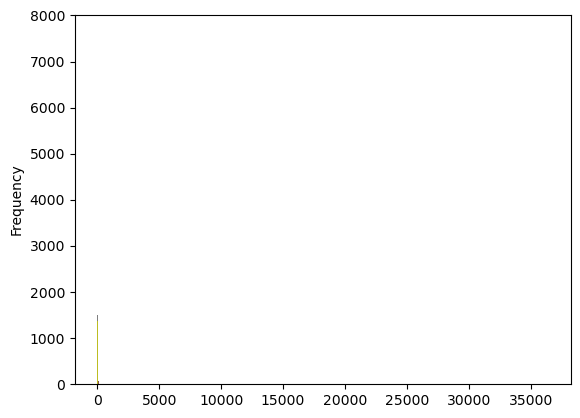

In [20]:
cont_var=customer_final.select_dtypes(include=['int64','float64']).columns
for column in cont_var:
    customer_final[column].value_counts().plot(kind='hist')
    
    

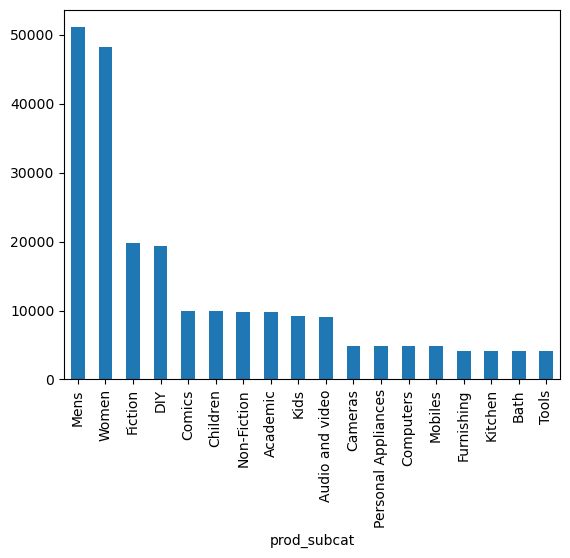

In [21]:
for column in cat_var:
    customer_final[column].value_counts().plot(kind='bar')
    

### 4. Calculate the following information using the merged dataset :
###  a. Time period of the available transaction data

In [22]:
#changing dtypes
customer_final['tran_date']=pd.to_datetime(customer_final['tran_date'],errors='coerce')

C:\Users\Admin\AppData\Local\Temp\ipykernel_4708\4121681062.py:2: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  customer_final['tran_date']=pd.to_datetime(customer_final['tran_date'],errors='coerce')


In [23]:
start_date=customer_final['tran_date'].max()
end_date=customer_final['tran_date'].min()
time_period=start_date-end_date
time_period

Timedelta('1130 days 00:00:00')

###  b. Count of transactions where the total amount of transaction was negative

In [24]:
x=customer_final['total_amt']<0
x.sum()

9294

### 5. Analyze which product categories are more popular among females vs male customers.

In [29]:
female=customer_final[customer_final['Gender']=='F']
pop_amg_female=female.groupby(['Gender','prod_cat'])['total_amt'].sum().sort_values(ascending=False)
most_pop_amg_female=pop_amg_female.head(1)
most_pop_amg_female


Gender  prod_cat
F       Books       36988153.41
Name: total_amt, dtype: float64

In [30]:
male=customer_final[customer_final['Gender']=='M']
pop_amg_male=male.groupby(['Gender','prod_cat'])['total_amt'].sum().sort_values(ascending=False)
most_pop_amg_male=pop_amg_male.head(1)
most_pop_amg_male

Gender  prod_cat
M       Books       39875836.65
Name: total_amt, dtype: float64

### 6. Which City code has the maximum customers and what was the percentage of customers from 
### that city?

In [34]:
tot_cust_per_city=customer_final.groupby('city_code')['cust_id'].count()
tot_cust=tot_cust_per_city.sum()
per_of_cust=(tot_cust_per_city/tot_cust)
per_of_cust.sort_values(ascending=False).head(1)


city_code
4.0    0.106463
Name: cust_id, dtype: float64

### 7. Which store type sells the maximum products by value and by quantity?


In [42]:
by_value=customer_final.groupby('Store_type')['total_amt'].sum()
by_value.sort_values(ascending=False).head(1)

Store_type
e-Shop    85915747.84
Name: total_amt, dtype: float64

In [46]:
by_qty=customer_final.groupby('Store_type')['Qty'].sum()
by_qty.sort_values(ascending=False).head(1)

Store_type
e-Shop    98447
Name: Qty, dtype: int64

### 8. What was the total amount earned from the "Electronics" and "Clothing" categories from 
### Flagship Stores?


In [70]:
flagship_electronics_sales = customer_final[(customer_final['Store_type'] == 'Flagship store') & (customer_final['prod_cat'].isin(['Electronics','Clothing']))]
total_amnt_earned=flagship_electronics_sales['total_amt'].sum()
total_amnt_earned

14658949.89

### 9. What was the total amount earned from "Male" customers under the "Electronics" category?

In [77]:
male_cust=customer_final[customer_final['Gender']=='M']
electronics=male_cust[male_cust['prod_cat']=='Electronics']
electronics['total_amt'].sum()

28515547.125

### 10. How many customers have more than 10 unique transactions, after removing all transactions 
### which have any negative amounts?


In [83]:
positive_transaction=customer_final[customer_final['total_amt']>0]
transaction=positive_transaction.groupby('cust_id')['transaction_id'].nunique()
total=transaction[transaction>10].count()
total

6

### 11. For all customers aged between 25 - 35, find out:
###  a. What was the total amount spent for “Electronics” and “Books” product categories?


In [101]:
customer_final['age']=dt.datetime.now().year-customer_final['DOB'].dt.year
age_btw_25to35=customer_final[(customer_final['age']>25) & (customer_final['age']<35)]

In [102]:
age_btw_25to35

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,customer_Id,DOB,Gender,city_code,prod_cat,prod_sub_cat_code,prod_subcat,age
45,43469248603,268444,2012-07-31,4,1,2,403,84.630,890.630,MBR,268444,1992-01-02,F,6.0,Clothing,4,Mens,32
46,43469248603,268444,2012-07-31,4,1,2,403,84.630,890.630,MBR,268444,1992-01-02,F,6.0,Clothing,1,Women,32
47,43469248603,268444,2012-07-31,4,1,2,403,84.630,890.630,MBR,268444,1992-01-02,F,6.0,Clothing,3,Kids,32
117,90954125896,269387,2013-03-18,1,1,4,839,352.380,3708.380,MBR,269387,1990-02-03,F,10.0,Clothing,4,Mens,34
118,90954125896,269387,2013-03-18,1,1,4,839,352.380,3708.380,MBR,269387,1990-02-03,F,10.0,Clothing,1,Women,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99244,60156894486,272374,2011-05-20,10,6,3,691,217.665,2290.665,TeleShop,272374,1990-06-09,F,8.0,Home and kitchen,12,Tools,34
99285,65823235153,272650,2011-02-16,11,6,2,358,75.180,791.180,e-Shop,272650,1990-02-28,M,2.0,Home and kitchen,2,Furnishing,34
99286,65823235153,272650,2011-02-16,11,6,2,358,75.180,791.180,e-Shop,272650,1990-02-28,M,2.0,Home and kitchen,10,Kitchen,34
99287,65823235153,272650,2011-02-16,11,6,2,358,75.180,791.180,e-Shop,272650,1990-02-28,M,2.0,Home and kitchen,11,Bath,34


In [105]:
total_amount = age_btw_25to35[ (age_btw_25to35['prod_cat'].isin(['Electronics','Books']))]

In [107]:
total_amount['total_amt'].sum()

15517429.915

### b. What was the total amount spent by these customers between 1st Jan, 2014 to 1st Mar, 2014?


In [109]:
total_amnt_spent=age_btw_25to35[(age_btw_25to35['tran_date']>'2014-01-01') & (age_btw_25to35['tran_date']<'2014-03-01')]

In [111]:
total_amnt_spent['total_amt'].sum()

699670.53